Let us now explore the experiment results for the first few models to narrow the hyperparameter search space for the KDE models:

In [1]:
import json
import pandas as pd

res = []
with open("../results/experiments-results.jsonl", "r") as f:
    for line in f:
        res.append(json.loads(line))
# Convert to DataFrame for easier analysis
res = pd.DataFrame(res)
categorical_cols = ["model_class", "categorical_estimator_class", "continuous_estimator_class", "dataset"]
for col in categorical_cols:
    res[col] = res[col].astype("category")
res.head()

,model_class,categorical_estimator_class,continuous_estimator_class,dataset,num_folds,fold_index,categorical_estimator_params,continuous_estimator_params,accuracy,b_recall,b_precision,b_f1_score,s_recall,s_precision,s_f1_score,ams_score
0,CategoricalAwareBespokeNB,RobustCategoricalEstimator,RobustHistogramEstimator,drop-columns,10,9,{},"{'laplace_smoothing': 1e-07, 'bins': 520}",0.685881,0.703805,0.795453,0.746828,0.651351,0.533039,0.586286,0.428922
1,CategoricalAwareBespokeNB,RobustCategoricalEstimator,RobustHistogramEstimator,drop-columns,10,5,{},"{'laplace_smoothing': 0.001, 'bins': 730}",0.682919,0.704658,0.791346,0.745490,0.640902,0.528918,0.579550,0.439115
2,BespokeNB,CategoricalEstimator,HistogramEstimator,drop-columns,10,8,{},{'bins': 350},0.746528,0.861086,0.778633,0.817786,0.523594,0.659500,0.583741,0.541244
3,CategoricalAwareBespokeNB,RobustCategoricalEstimator,RobustHistogramEstimator,original,10,5,{},"{'laplace_smoothing': 0, 'bins': 410}",0.731359,0.739348,0.834166,0.783900,0.715918,0.586966,0.645061,0.473895
4,BespokeNB,RobustCategoricalEstimator,RobustHistogramEstimator,drop-columns,10,4,{},"{'laplace_smoothing': 0.01, 'bins': 920}",0.658016,0.530869,0.914600,0.671800,0.904073,0.498952,0.643023,0.519674


In [2]:
# Let us explore the dependency of the scores with the laplace_smoothing parameter.

# First, filter the results for the relevant experiments (those Robust or CategoricalAware).
laplace_results = res[
    (res["continuous_estimator_class"].str.contains("Robust")) | (res["model_class"].str.contains("CategoricalAware"))
]
laplace_results.head()

,model_class,categorical_estimator_class,continuous_estimator_class,dataset,num_folds,fold_index,categorical_estimator_params,continuous_estimator_params,accuracy,b_recall,b_precision,b_f1_score,s_recall,s_precision,s_f1_score,ams_score
0,CategoricalAwareBespokeNB,RobustCategoricalEstimator,RobustHistogramEstimator,drop-columns,10,9,{},"{'laplace_smoothing': 1e-07, 'bins': 520}",0.685881,0.703805,0.795453,0.746828,0.651351,0.533039,0.586286,0.428922
1,CategoricalAwareBespokeNB,RobustCategoricalEstimator,RobustHistogramEstimator,drop-columns,10,5,{},"{'laplace_smoothing': 0.001, 'bins': 730}",0.682919,0.704658,0.791346,0.745490,0.640902,0.528918,0.579550,0.439115
3,CategoricalAwareBespokeNB,RobustCategoricalEstimator,RobustHistogramEstimator,original,10,5,{},"{'laplace_smoothing': 0, 'bins': 410}",0.731359,0.739348,0.834166,0.783900,0.715918,0.586966,0.645061,0.473895
4,BespokeNB,RobustCategoricalEstimator,RobustHistogramEstimator,drop-columns,10,4,{},"{'laplace_smoothing': 0.01, 'bins': 920}",0.658016,0.530869,0.914600,0.671800,0.904073,0.498952,0.643023,0.519674
5,CategoricalAwareBespokeNB,RobustCategoricalEstimator,RobustHistogramEstimator,original,10,2,{},"{'laplace_smoothing': 1e-06, 'bins': 120}",0.674148,0.642234,0.822247,0.721177,0.735051,0.518449,0.608035,0.394734


In [3]:
# Now let's create a column with the laplace_smoothing value for easier plotting.
from typing import Optional


def extract_laplace_smoothing(params: dict) -> Optional[float]:
    return params.get("laplace_smoothing", None)


laplace_results["laplace_smoothing"] = laplace_results["continuous_estimator_params"].apply(extract_laplace_smoothing)
laplace_results.head()

C:\Users\mirxm\AppData\Local\Temp\ipykernel_20948\3176940192.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laplace_results["laplace_smoothing"] = laplace_results["continuous_estimator_params"].apply(extract_laplace_smoothing)


,model_class,categorical_estimator_class,continuous_estimator_class,dataset,num_folds,fold_index,categorical_estimator_params,continuous_estimator_params,accuracy,b_recall,b_precision,b_f1_score,s_recall,s_precision,s_f1_score,ams_score,laplace_smoothing
0,CategoricalAwareBespokeNB,RobustCategoricalEstimator,RobustHistogramEstimator,drop-columns,10,9,{},"{'laplace_smoothing': 1e-07, 'bins': 520}",0.685881,0.703805,0.795453,0.746828,0.651351,0.533039,0.586286,0.428922,1.000000e-07
1,CategoricalAwareBespokeNB,RobustCategoricalEstimator,RobustHistogramEstimator,drop-columns,10,5,{},"{'laplace_smoothing': 0.001, 'bins': 730}",0.682919,0.704658,0.791346,0.745490,0.640902,0.528918,0.579550,0.439115,1.000000e-03
3,CategoricalAwareBespokeNB,RobustCategoricalEstimator,RobustHistogramEstimator,original,10,5,{},"{'laplace_smoothing': 0, 'bins': 410}",0.731359,0.739348,0.834166,0.783900,0.715918,0.586966,0.645061,0.473895,0.000000e+00
4,BespokeNB,RobustCategoricalEstimator,RobustHistogramEstimator,drop-columns,10,4,{},"{'laplace_smoothing': 0.01, 'bins': 920}",0.658016,0.530869,0.914600,0.671800,0.904073,0.498952,0.643023,0.519674,1.000000e-02
5,CategoricalAwareBespokeNB,RobustCategoricalEstimator,RobustHistogramEstimator,original,10,2,{},"{'laplace_smoothing': 1e-06, 'bins': 120}",0.674148,0.642234,0.822247,0.721177,0.735051,0.518449,0.608035,0.394734,1.000000e-06


C:\Users\mirxm\AppData\Local\Temp\ipykernel_20948\3482648260.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laplace_results["group"] = laplace_results.apply(


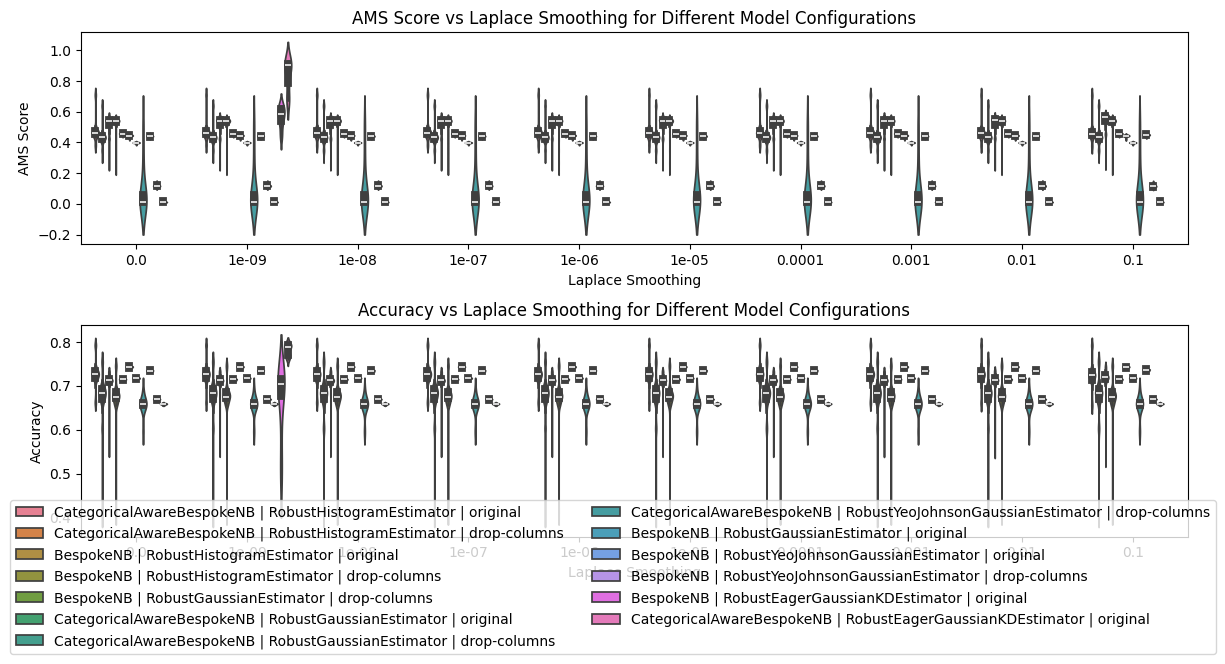

In [4]:
# Now, we can plot the AMS score against the laplace_smoothing parameter for different model configurations.
import matplotlib.pyplot as plt
import seaborn as sns

laplace_results["group"] = laplace_results.apply(
    lambda row: f"{row['model_class']} | {row['continuous_estimator_class']} | {row['dataset']}", axis=1
)
fig, ax = plt.subplots(2, 1, figsize=(12, 6))

sns.violinplot(data=laplace_results, x="laplace_smoothing", y="ams_score", hue="group", ax=ax[0], legend=False)
ax[0].set_xlabel("Laplace Smoothing")
ax[0].set_ylabel("AMS Score")
ax[0].set_title("AMS Score vs Laplace Smoothing for Different Model Configurations")

sns.violinplot(data=laplace_results, x="laplace_smoothing", y="accuracy", hue="group", ax=ax[1], legend=True)
ax[1].set_xlabel("Laplace Smoothing")
ax[1].set_ylabel("Accuracy")
ax[1].set_title("Accuracy vs Laplace Smoothing for Different Model Configurations")
# Disable the legend, as we will create a custom one below
ax[1].legend_.remove()

plt.tight_layout()
# Add create the custom legend
handles, labels = ax[1].get_legend_handles_labels()
fig.legend(handles, labels, ncol=2, loc="lower left", bbox_to_anchor=(0, -0.11))
plt.show()

One can see that the laplace smoothing parameter doesn't have absolutely any effect on the model performance, so we will ignore it for the KDE models going forward.

### Final Parameter Selection

Now that we have all the results, we can select the best parameters for each model.

In [24]:
# For each combination, find the best hyperparameters based on the highest AMS score
import matplotlib.pyplot as plt
import seaborn as sns
import json

# Get all the unique combinations of model_class, continuous_estimator_class, categorical_estimator_class, and dataset
unique_combinations = res[
    ["model_class", "continuous_estimator_class", "categorical_estimator_class", "dataset"]
].drop_duplicates()
tline = "├"
hline = "─"
vline = "│"

final_experiments = []
for model_class in res["model_class"].unique():
    if not any(res["model_class"] == model_class):
        continue
    print(f"Model Class: {model_class}")
    for continuous_estimator_class in res["continuous_estimator_class"].unique():
        if not any(
            (res["model_class"] == model_class) & (res["continuous_estimator_class"] == continuous_estimator_class)
        ):
            continue
        print(f" {tline}{hline*2} Continuous Estimator Class: {continuous_estimator_class}")
        for categorical_estimator_class in res["categorical_estimator_class"].unique():
            if not any(
                (res["model_class"] == model_class)
                & (res["continuous_estimator_class"] == continuous_estimator_class)
                & (res["categorical_estimator_class"] == categorical_estimator_class)
            ):
                continue
            print(f" {vline}   Categorical Estimator Class: {categorical_estimator_class}")
            for dataset in res["dataset"].unique():
                if not any(
                    (res["model_class"] == model_class)
                    & (res["continuous_estimator_class"] == continuous_estimator_class)
                    & (res["categorical_estimator_class"] == categorical_estimator_class)
                    & (res["dataset"] == dataset)
                ):
                    continue
                print(f" {vline}   {tline}{hline*2} Dataset: {dataset}")
                subset = res[
                    (res["model_class"] == model_class)
                    & (res["continuous_estimator_class"] == continuous_estimator_class)
                    & (res["categorical_estimator_class"] == categorical_estimator_class)
                    & (res["dataset"] == dataset)
                ]

                # Compute the average AMS for each hyperparameter setting
                avg_ams = subset.groupby(
                    subset["continuous_estimator_params"].apply(lambda x: json.dumps(x, sort_keys=True))
                )["ams_score"].mean()
                # Find the best hyperparameter setting
                best_hyperparam = avg_ams.idxmax()
                best_ams = avg_ams.max()
                final_experiments.append(
                    {
                        "model_class": model_class,
                        "continuous_estimator_class": continuous_estimator_class,
                        "categorical_estimator_class": categorical_estimator_class,
                        "dataset": dataset,
                        "continuous_estimator_params": json.loads(best_hyperparam),
                    }
                )
                for param_str, param_value in json.loads(best_hyperparam).items():
                    print(f" {vline}   {vline}   {vline}   {param_str}: {param_value}")
                print(f" {vline}   {vline}   {vline}   -----------------------------")
                print(f" {vline}   {vline}   {vline}   Number of Experiments: {len(subset)}")
                print(f" {vline}   {vline}   {vline}   Best Average AMS: {best_ams:.4f}")

Model Class: CategoricalAwareBespokeNB
 ├── Continuous Estimator Class: RobustHistogramEstimator
 │   Categorical Estimator Class: RobustCategoricalEstimator
 │   ├── Dataset: drop-columns
 │   │   │   bins: 20
 │   │   │   laplace_smoothing: 0.0001
 │   │   │   -----------------------------
 │   │   │   Number of Experiments: 10000
 │   │   │   Best Average AMS: 0.4723
 │   ├── Dataset: original
 │   │   │   bins: 20
 │   │   │   laplace_smoothing: 0
 │   │   │   -----------------------------
 │   │   │   Number of Experiments: 9900
 │   │   │   Best Average AMS: 0.5134
 ├── Continuous Estimator Class: RobustGaussianEstimator
 │   Categorical Estimator Class: RobustCategoricalEstimator
 │   ├── Dataset: drop-columns
 │   │   │   laplace_smoothing: 0.0001
 │   │   │   -----------------------------
 │   │   │   Number of Experiments: 100
 │   │   │   Best Average AMS: 0.3983
 │   ├── Dataset: original
 │   │   │   laplace_smoothing: 0
 │   │   │   -----------------------------
 │   │   

In [25]:
len(final_experiments)
with open("../results/final-experiments.jsonl", "w") as f:
    for exp in final_experiments:
        f.write(json.dumps(exp) + "\n")